# Adam Optimizer
### One of the best and mostused optimizer in deep learning for fast convergence of lost function leading to less time
### Adam is the combination of "RMSprop" and "Momentum" optimizer that gives adam the ability to converge fast what the momentum does and performing best also when sparse data is leading to the working of the RMSprop optimizer


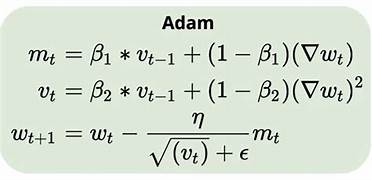

### In the formula
#### 1. m(t) - represent the momentum part with beta1
#### 2. v(t) - represent the rsmprop part with beta2
#### Note : after calculating the mt and vt the are adjusted to overcome the bias problem
#### wt+1 - is the final updated with contains the adjusted mt and vt

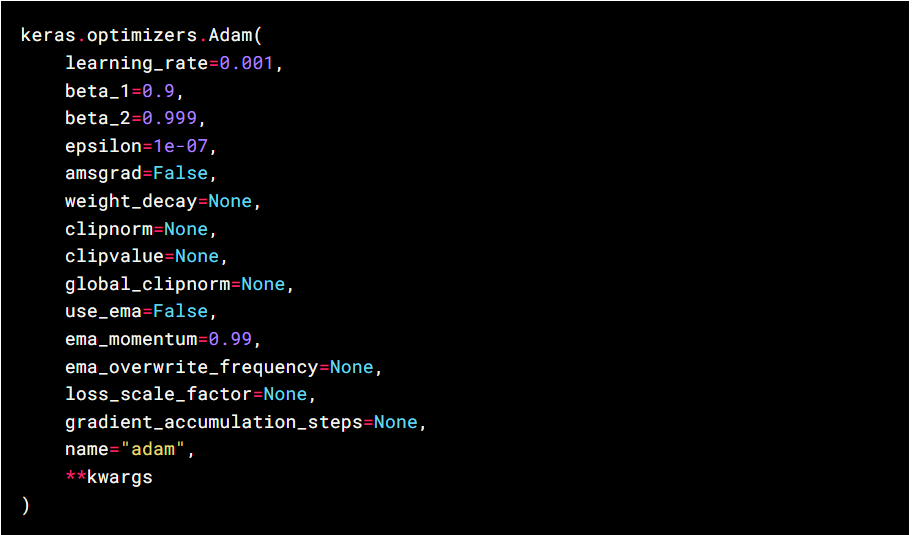

the above mentioned value in the picture are defaults value

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adagrad,RMSprop,Adam

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.2515)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
### building the model
model = Sequential([
    Dense(10,activation='relu',input_dim=2),
    Dense(5,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
### Compiling the model
adam = Adam(
    learning_rate = 0.01,
    beta_1 = 0.9,
    beta_2 = 0.999,
    epsilon = 1e-9
)
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(
    X_train,y_train,
    batch_size = 32,
    validation_data = (X_test,y_test),
    epochs=100
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.8430 - loss: 0.3503 - val_accuracy: 0.9000 - val_loss: 0.2929
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8547 - loss: 0.3335 - val_accuracy: 0.9000 - val_loss: 0.2995
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8664 - loss: 0.3173 - val_accuracy: 0.9000 - val_loss: 0.2945
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8523 - loss: 0.3132 - val_accuracy: 0.8500 - val_loss: 0.2948
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8273 - loss: 0.3567 - val_accuracy: 0.8500 - val_loss: 0.2835
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8664 - loss: 0.3112 - val_accuracy: 0.9000 - val_loss: 0.2724
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8586 - loss: 0.3048 - val_accuracy: 0.9000 - val_loss: 0.2667
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8664 - loss: 0.2980 - val_accuracy: 0.9000 - val_loss

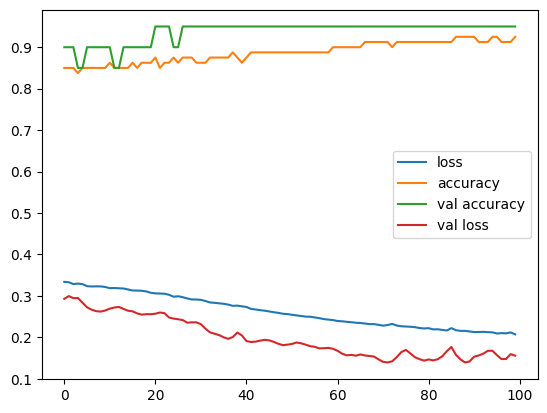

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.plot(history.history['val_loss'],label = 'val loss')
plt.legend()

Conclusion: Both losses are consistently decreasing, indicating the model is learning effectively. The fact that the validation loss is consistently lower than the training loss is unusual but can sometimes happen, especially if the validation set is "easier" or if there's heavy regularization (like dropout) applied only during training, which artificially inflates the training loss compared to the validation loss.